In [8]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [342]:
# Hyper-parameters
INPUT_SIZE = 1
OUTPUT_SIZE = 1
NUM_EPOCHS = 100
LEARNING_RATE = 0.1
BATCH_SIZE = 64
n = 11500

In [343]:
# Toy dataset
x_train = np.linspace(0, n, n).astype(np.float32).reshape((-1,1))
# Scale the inputs; failing to do this results in NaN values for the loss.
x_train = (x_train - np.min(x_train))/(np.max(x_train) - np.min(x_train))
y_train = x_train * x_train * x_train + np.random.normal(0,.02, n).astype(np.float32).reshape((-1,1))
y_train = (y_train - np.min(y_train))/(np.max(y_train) - np.min(y_train))

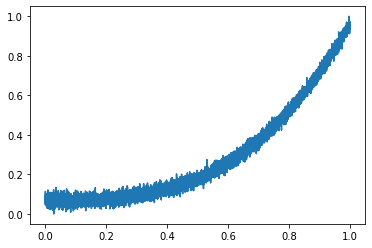

In [344]:
plt.plot(x_train, y_train)

In [355]:
class MLPModel(nn.Module):
    def __init__(self, input_size, output_size, dropout=0.0, n_hid=256):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, n_hid),
            nn.ReLU(),          
            nn.Linear(n_hid, n_hid//2),
            nn.ReLU(),
            nn.Linear(n_hid//2, output_size),
        )
        for m in self.model:
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight)
                nn.init.constant_(m.bias, 0)

    def forward(self, input_tensor):
        return self.model(input_tensor)

In [356]:
# Linear regression model
model =  MLPModel(INPUT_SIZE, OUTPUT_SIZE)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)  

In [357]:
# Train the model
for epoch in range(NUM_EPOCHS):
    
    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
    permutation = torch.randperm(torch.from_numpy(x_train).size()[0])
    
    for i in range(0,torch.from_numpy(x_train).size()[0], BATCH_SIZE):
    
        indices = permutation[i:i+BATCH_SIZE]
        inputs, targets = x_train[indices], y_train[indices]
    
        # Convert numpy arrays to torch tensors
        inputs = torch.from_numpy(inputs)
        targets = torch.from_numpy(targets)

        # Forward pass
        outputs = model.forward(inputs)
        loss = criterion(outputs, targets)
    
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, NUM_EPOCHS, loss.item()))

Epoch [10/100], Loss: 0.0457
Epoch [20/100], Loss: 0.0499
Epoch [30/100], Loss: 0.0751
Epoch [40/100], Loss: 0.0574
Epoch [50/100], Loss: 0.0599
Epoch [60/100], Loss: 0.0517


KeyboardInterrupt: 

In [ ]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data', alpha = 0.3)
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()